# Cvičení 1 - Úvod do neuronových sítí

V tomto cvičení si ukážeme prácis s jazykem **Python** a jeho knihovnami, především [PyTorch](https://pytorch.org/).

Obdobným způsobem se pracuje i s dalšími používanými knihovnami jako např. [TensorFlow](https://www.tensorflow.org/), [JAX](https://docs.jax.dev/en/latest/), [Flux.jl](https://fluxml.ai/) nebo [Deep Learning Toolbox](https://www.mathworks.com/products/deep-learning.html).

Pro detailnější tutoriál k PyTorch jsou dostupné i [oficiální tutoriály](https://pytorch.org/tutorials/).

## Instalace v prostředí uv a Jupyter

Nainstalujeme Jupyter dle pokynů z [webu](https://jupyter.org/install). Obdobně s balíčkovacím systémem [uv](https://docs.astral.sh/uv/).

Vytvoříme uv balíček a propojíme ho s Jupyterem
```bash
$ uv init
$ uv add --dev ipykernel
$ uv run ipython kernel install --user --env VIRTUAL_ENV $(pwd)/.venv --name=tzn
```

Pro dostupnost tohoto kernelu musíme restartovat Jupyter.

Nainstalujeme potřebné balíčky

```bash
$ uv add matplotlib numpy scikit-learn torch torch-geometric torchvision
$ uv add torch-cluster -f https://data.pyg.org/whl/torch-2.8.0+cpu.html
```

## Úkol 1

Zprovozněte své prostředí tak, aby se následující buňka spustila bez chyb a zobrazila něco jako `Torch version: 2.8.0`.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

print("Torch version:", torch.__version__)

Torch version: 2.8.0+cu128


## Tenzory a práce s nimi v PyTorch

Nejprve se podívejme na to, co se vlastně při standardním využití děje na pozadí - manipulace s tenzory a automatické počítání gradientu.

Tenzor je vlastně název pro $n$ rozměrné pole - tj. jako `ndarray` v numpy.

Převod numpy nebo python matice na konstantní tenzor:

In [2]:
a = torch.tensor([[1, 2], [3,4]])
print(a)

tensor([[1, 2],
        [3, 4]])


Převod zpět do numpy:

In [3]:
print(a.numpy())

[[1 2]
 [3 4]]


Tensor vždy obsahuje základní atributy `shape` a `dtype`:

In [4]:
print('Rozměr:', a.shape)
print('Datový typ:', a.dtype)

Rozměr: torch.Size([2, 2])
Datový typ: torch.int64


Další způsoby, jak vytvořit Tensor:

In [5]:
print(torch.ones((1, 3)))
print(torch.zeros((1, 3)))
print(torch.randn((1, 4))) # Normální rozdělení
print(torch.rand((1, 4))) # Uniformní rozdělení na [0, 1)

tensor([[1., 1., 1.]])
tensor([[0., 0., 0.]])
tensor([[ 0.7136, -1.5067, -1.4281,  0.3497]])
tensor([[0.4411, 0.9482, 0.9969, 0.4341]])


S tenzory můžeme dělat běžné operace - maticové atd. Vyrobíme si nějaké tenzory (musí být stejného datového typu):

In [6]:
a = torch.tensor([[1, 2], [3,4]], dtype = torch.float32)
b = torch.ones((2, 1))
c = torch.randn((2, 1))
print(a)
print(b)
print(c)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1.],
        [1.]])
tensor([[0.5909],
        [0.0166]])


Maticový součin:

In [7]:
print(a.matmul(b))

tensor([[3.],
        [7.]])


Součet po složkách:

In [8]:
print(b.add(c))

tensor([[1.5909],
        [1.0166]])


Kvadrát po složkách:

In [9]:
print(a.square())

tensor([[ 1.,  4.],
        [ 9., 16.]])


Eukleidovská norma vektoru:

In [10]:
print(b.norm())

tensor(1.4142)


Hodnost matice:

In [11]:
print(torch.linalg.matrix_rank(a))

tensor(2)


Aplikace funkce sinus po složkách:

In [12]:
print(torch.sin(a))

tensor([[ 0.8415,  0.9093],
        [ 0.1411, -0.7568]])


Boolovský idikátor toho, zda je daná složka matice větší než 1:

In [13]:
print(a.greater(1))

tensor([[False,  True],
        [ True,  True]])


## Úkol 2 - základní práce s daty

Načteme dataset [MNIST](https://en.wikipedia.org/wiki/MNIST_database) a zkusíme spočítat průměrné hodnoty jeho jednotlivých feature. První spuštění následující buňky může trvat déle, než se dataset stáhne.

In [14]:
data = datasets.MNIST(
    root = "data",
    download = True,
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0, 1)])
)

Načetli jsme obrázky z datasetu MNIST. Nyní zkuste spočítat průměrnou hodnotu každé feature napříč všemi obrázky. Využijte třídu [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

## Řešení

Naše data mají následující tvar a datový typ:

In [15]:
display(data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0, std=1)
           )

In [16]:
print(data[0][0].shape)
print(data[0][0].dtype)
print(data[0][1]) # Label

torch.Size([1, 28, 28])
torch.float32
5


Pro snadnější práci s datasetem si ho načteme do pomocné třídy `DataLoader`:

In [17]:
dataloader = DataLoader(data, batch_size = 1)

Spočteme průměr všech obrázků:

In [18]:
mean_image = torch.zeros(data[0][0].shape, dtype = data[0][0].dtype)

for image, _label in dataloader:
    mean_image += image[0, :, :, :] # První dimenze je batch, tady o velikosti 1

mean_image /= len(data)

Vykreslíme pomocí `matplotlib`:

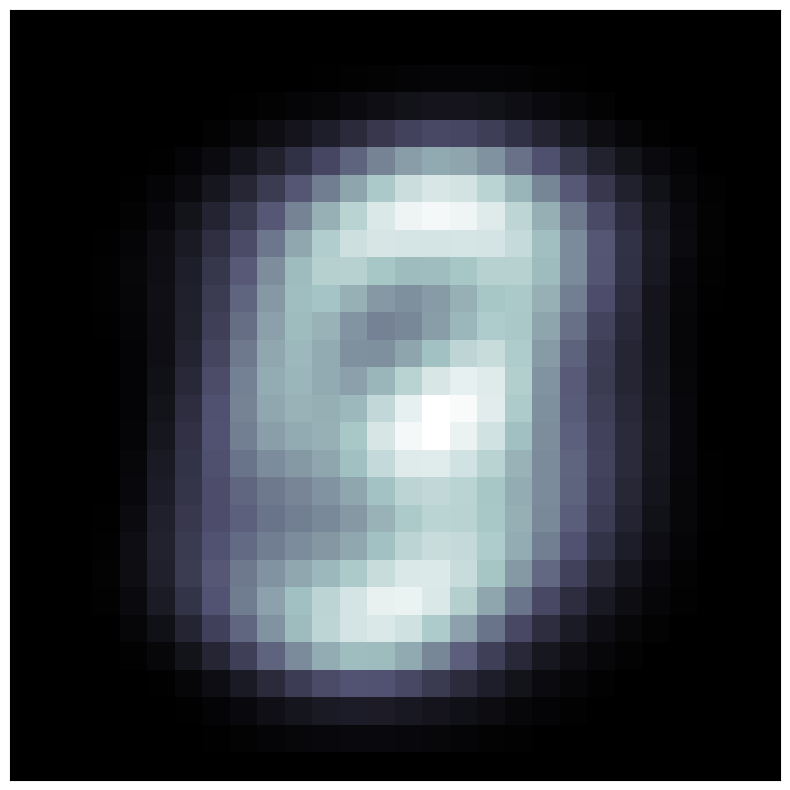

In [19]:
plt.figure(figsize=(10, 10))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(torch.reshape(mean_image, [mean_image.shape[1], mean_image.shape[2]]), cmap = plt.cm.bone)

## Automatické počítání gradientu

Objekt, který se používá na práci s proměnlivým obsahem, je standardní `torch.Tensor`. Nejzajímavější na něm je **automatické počítání gradientu** vzhledem k operacím prováděným s ním.

K tomu se používá parametr `requires_grad = True`, pomocí kterého se zaznamenávají operace se sledovaným tenzorem.
Gradient pak spočteme voláním metody `fun.backward()`, který spočte derivaci `fun` podle každé složky `x`. Pokud je `fun` tensor rozměru většího než 1, je potřeba funkci `backward` předat tensor, vzhledem ke kterému se má Jakobián spočítat.

In [20]:
x = torch.tensor([1, 2, 3], dtype = torch.float32, requires_grad = True)
print(x)

tensor([1., 2., 3.], requires_grad=True)


In [21]:
f = torch.square(x)
f.backward(torch.ones_like(f))

print('Derivace x^2:', x.grad)
with torch.no_grad():
    print('2*x:', 2*x)

Derivace x^2: tensor([2., 4., 6.])
2*x: tensor([2., 4., 6.])


In [22]:
x = torch.tensor([1, 2, 3], dtype = torch.float32, requires_grad = True)
print(x)

tensor([1., 2., 3.], requires_grad=True)


In [23]:
f = torch.sin(x)
f.backward(torch.ones_like(f))
    
print('Derivace sin(x):', x.grad)
with torch.no_grad():
    print('cos(x):', torch.cos(x))

Derivace sin(x): tensor([ 0.5403, -0.4161, -0.9900])
cos(x): tensor([ 0.5403, -0.4161, -0.9900])


## Jednoduchá síť na MNIST

Definujeme základní parametry modelu:

In [24]:
batch_size = 50
hidden_layer_width = 100
output_width = 10
learning_rate = 0.01

Připravíme si data do tříd DataLoader:

In [25]:
data_train = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0, 1)])
)
data_test = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0, 1)])
)

dataloader_train = DataLoader(data_train, batch_size = batch_size, shuffle = True)
dataloader_test = DataLoader(data_test, batch_size = batch_size, shuffle = True)

Vytvoříme jednoduchý model neuronové sítě pomocí `torch.nn.Sequential` což je třída, která za sebe poskládá vrstvy, které do ní vložíme (viz předchozí cvičení).

Vstupní vrstva je typu `torch.nn.Flatten`, tedy vrstva která převede obrázky do tvaru vektoru (opět automatizace z minulého cvičení).

Výslkedkem je instance [tf.nn.Module](https://pytorch.org/docs/main/generated/torch.nn.Module.html).

In [26]:
model = nn.Sequential()
model.append(nn.Flatten())

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
)

Přidáme jednu skrytou vrstvu se 100 neurony a aktivační funkcí `tanh`

In [27]:
model.append(nn.Linear(data_train.data.shape[1] * data_train.data.shape[2], hidden_layer_width))
model.append(nn.Tanh())

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): Tanh()
)

Přidáme výstupní vrstvu s 10 neurony (= počet tříd) a aktivační funkcí softmax
$$ \sigma \left( \vec{z} \right)_i = \frac{e^{\vec{z}_i}}{\sum_{j = 1}^K e^{\vec{z}_j}} $$

In [28]:
model.append(nn.Linear(hidden_layer_width, output_width))
model.append(nn.Softmax(dim=1))

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): Tanh()
  (3): Linear(in_features=100, out_features=10, bias=True)
  (4): Softmax(dim=1)
)

Vytisknutí modelu nám vytiskne kompletní informace:

In [29]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): Tanh()
  (3): Linear(in_features=100, out_features=10, bias=True)
  (4): Softmax(dim=1)
)

Takto vytvořený model zároveň funguje jako funkce a můžeme ho rovnou aplikovat na data.

Výskedkem budou vektory pravděpodobností. Protože jsme ale model zatím netrénovali, výsledky budou prakticky náhodné

In [30]:
model(data_train[0][0])

tensor([[0.0992, 0.1177, 0.0925, 0.0900, 0.1016, 0.0988, 0.0817, 0.1047, 0.1055,
         0.1081]], grad_fn=<SoftmaxBackward0>)

Výslednou "předpověď" modelu pak bereme jako položku s nejvyšší pravděpodobností:

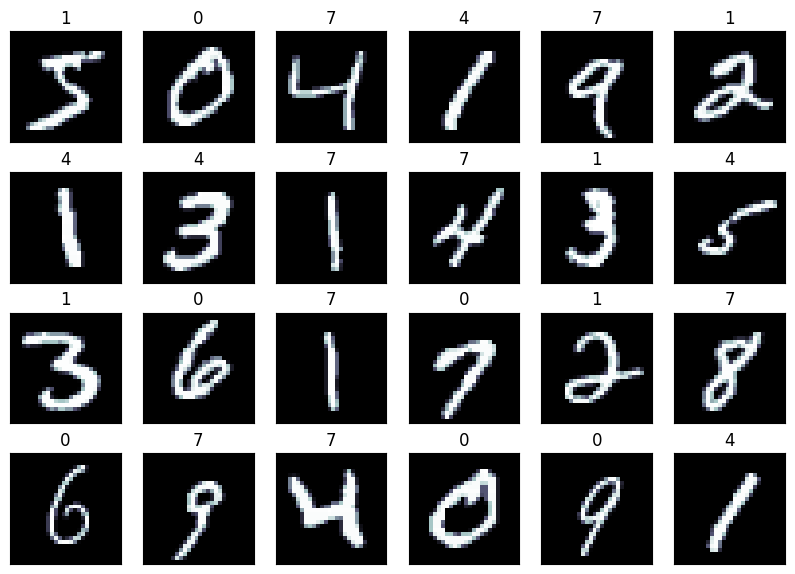

In [31]:
plt.figure(figsize=(10, 7))
for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[i][0].reshape(28, 28), cmap = plt.cm.bone)
    plt.title(model(data_train[i][0]).detach().argmax(axis = 1).item())

## Trénování modelu

Nyní můžeme model natrénovat. Co budeme dále potřebovat:
* loss - ztrátová funkce, kterou chceme při trénování minimalizovat,
* optimizer - funkce, která pracuje s gradientem a udělá krok gradientního sestupu,

Poznámky:
* `torch.nn.NLLLoss` je cross-entropie, kde vstup je pravděpodobnostní rozdělení
* `torch.nn.CrossEntropyLoss()` je cross-entropie, kde vstup jsou váhy jednotlivých tříd (tj. jejich suma nemusí být 1)

Jinými slovy `CrossEntropyLoss` kombinuje `NLLLoss` a `Softmax`.

Použijeme stochastický gradientní sestup.

In [32]:
loss_fn = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters())
epochs = 10

K trénování modelu použijeme `DataLoader`, obdobně jako v minulém cvičení. 
Trénování v mini batchích znamená, že se dataset rozdělí na bločky (mini batche) a pak se pro každý bloček spočítá ztrátová funkce a udělá jede krok gradientního sestupu. Jedna epocha pak znamená projití celého datasetu. V jedné epoše tedy dojde k mnoha krokům gradientního sestupu.

In [33]:
def calculate_accuracy(model, dataloader):
    num_correct = 0
    
    with torch.no_grad():
        for (X, y) in dataloader:
            pred = model(X)
            num_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    accuracy = num_correct / len(dataloader.dataset)
    return accuracy

In [34]:
def calculate_loss_accuracy(model, dataloader, loss_fn):
    loss = 0
    num_correct = 0
    
    with torch.no_grad():
        for (X, y) in dataloader:
            pred = model(X)
            loss += loss_fn(pred, y).item()
            num_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    loss /= len(dataloader)
    accuracy = num_correct / len(dataloader.dataset)
    return loss, accuracy

In [35]:
def train_model(model, loss_fn, optimizer, epochs, dataloader_train, dataloader_test, early_stopper = None, log_period = 10000):
    for epoch in range(epochs):
        processed_since_log = 0
        for batch, (X, y) in enumerate(dataloader_train):
            model.train()
            pred = model(X)
            loss = loss_fn(pred, y)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            processed_since_log += dataloader_train.batch_size

            if processed_since_log >= log_period:
                current = min((batch + 1) * dataloader_train.batch_size, len(data_train))
                loss = loss.item()
                model.eval()
                train_acc = calculate_accuracy(model, dataloader_train)
                test_loss, test_acc = calculate_loss_accuracy(model, dataloader_test, loss_fn)
                print(f"train loss: {loss:>7f}  test loss: {test_loss:>7f}  train accuracy: {train_acc:>3f}  test accuracy: {test_acc:>3f}  [sample {current:>5d}/{len(data_train):>5d}] [epoch {epoch+1:>2d}/{epochs:>2d}]")
                processed_since_log -= log_period

In [36]:
train_model(model, loss_fn, optimizer, epochs, dataloader_train, dataloader_test)

train loss: -0.863523  test loss: -0.847577  train accuracy: 0.891250  test accuracy: 0.895100  [sample 10000/60000] [epoch  1/10]
train loss: -0.838423  test loss: -0.886487  train accuracy: 0.910867  test accuracy: 0.913100  [sample 20000/60000] [epoch  1/10]
train loss: -0.964829  test loss: -0.901992  train accuracy: 0.920267  test accuracy: 0.922700  [sample 30000/60000] [epoch  1/10]
train loss: -0.916569  test loss: -0.911002  train accuracy: 0.927233  test accuracy: 0.926200  [sample 40000/60000] [epoch  1/10]
train loss: -0.873857  test loss: -0.917795  train accuracy: 0.932217  test accuracy: 0.929800  [sample 50000/60000] [epoch  1/10]
train loss: -0.933380  test loss: -0.922855  train accuracy: 0.937033  test accuracy: 0.935600  [sample 60000/60000] [epoch  1/10]
train loss: -0.915446  test loss: -0.927125  train accuracy: 0.941017  test accuracy: 0.937200  [sample 10000/60000] [epoch  2/10]
train loss: -0.944780  test loss: -0.931036  train accuracy: 0.943600  test accurac

### Evaluace modelu a predikce

K evaluaci modelu na testovací množině využijeme výše implementované funkce.

In [37]:
model.eval()
test_loss, test_acc = calculate_loss_accuracy(model, dataloader_test, loss_fn)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: -0.9677545896172524
Test accuracy: 0.9713


Pokud chceme přímo "syrové" hodnoty, můžeme použít model jako funkci:

In [38]:
predictions = model(data_test[0][0])
print('Predictions shape:', predictions.shape)
print('Predikce pravděpodobností pro první obrázek:', predictions[0, 0].item())

Predictions shape: torch.Size([1, 10])
Predikce pravděpodobností pro první obrázek: 1.4717500829153352e-10


Pro získání predikcí tříd můžeme použít `torch.argmax`, která vrátí index maximální pravděpodobnosti.

In [39]:
Y_pred = predictions.detach().argmax(dim = 1)
print('Predikce pravděpodobností pro první obrázek:', predictions.detach())
print('Predikce labelu pro první obrázek:', Y_pred[0].item())

Predikce pravděpodobností pro první obrázek: tensor([[1.4718e-10, 2.9802e-14, 5.4084e-09, 1.3733e-07, 3.7540e-14, 1.8435e-09,
         8.2348e-18, 1.0000e+00, 2.8652e-10, 3.6700e-08]])
Predikce labelu pro první obrázek: 7


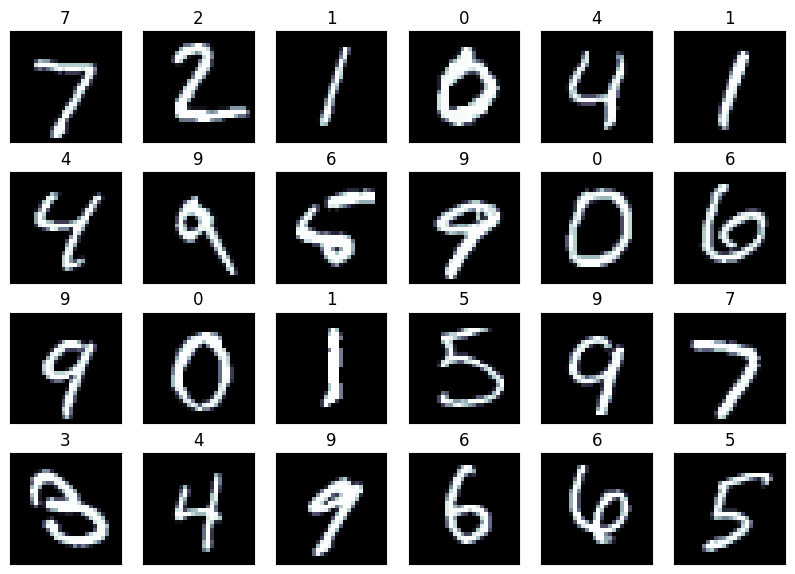

In [40]:
plt.figure(figsize=(10, 7))
for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_test[i][0].reshape(28, 28), cmap = plt.cm.bone)
    plt.title(model(data_test[i][0]).detach().argmax(axis = 1).item())

## Úkol 3 - Manuální vytvoření modelu

Definujeme základní parametry modelu:

In [41]:
batch_size = 50
hidden_layer_width = 100
output_width = 10
learning_rate = 0.01
epochs = 10
loss_fn = nn.CrossEntropyLoss()

Definuji si proměnné pro neuronovou síť s 1 skrytou vrstvou velikosti 100:

In [42]:
# Průměr 0, směrodatná odchylka 0.1
W1 = (0.1 * torch.randn((data_train[0][0].shape[1] * data_train[0][0].shape[2], hidden_layer_width))).clone().requires_grad_(True)
b1 = torch.zeros((hidden_layer_width,), requires_grad = True)
W2 = (0.1 * torch.randn((hidden_layer_width, output_width))).clone().requires_grad_(True)
b2 = torch.zeros((output_width,), requires_grad = True)

Definujeme funkci vykonávající dopředný chod sítě:

In [43]:
def predict(inputs):
    inputs_flat = torch.nn.Flatten()(inputs)
    output_1 = torch.tanh(inputs_flat.matmul(W1).add(b1))
    output_2 = torch.nn.Softmax(dim = 1)(output_1.matmul(W2).add(b2))
    return output_2

Natrénujeme model:

In [44]:
log_period = 10000

for epoch in range(epochs):
    processed_since_log = 0
    for batch, (X, y) in enumerate(dataloader_train):
        pred = predict(X)
        loss = loss_fn(pred, y)
        loss.backward()

        for variable in [W1, b1, W2, b2]:
            with torch.no_grad():
                variable -= variable.grad * learning_rate
            variable.grad = None

        processed_since_log += dataloader_train.batch_size

        if processed_since_log >= log_period:
            current = min((batch + 1) * dataloader_train.batch_size, len(data_train))
            loss = loss.item()
            train_acc = calculate_accuracy(predict, dataloader_train)
            test_loss, test_acc = calculate_loss_accuracy(predict, dataloader_test, loss_fn)
            print(f"train loss: {loss:>7f}  test loss: {test_loss:>7f}  train accuracy: {train_acc:>3f}  test accuracy: {test_acc:>3f}  [sample {current:>5d}/{len(data_train):>5d}] [epoch {epoch+1:>2d}/{epochs:>2d}]")
            processed_since_log -= log_period

train loss: 2.261123  test loss: 2.275561  train accuracy: 0.195883  test accuracy: 0.199700  [sample 10000/60000] [epoch  1/10]
train loss: 2.254170  test loss: 2.242683  train accuracy: 0.284983  test accuracy: 0.288100  [sample 20000/60000] [epoch  1/10]
train loss: 2.196942  test loss: 2.194842  train accuracy: 0.421450  test accuracy: 0.423600  [sample 30000/60000] [epoch  1/10]
train loss: 2.095738  test loss: 2.135336  train accuracy: 0.467950  test accuracy: 0.471100  [sample 40000/60000] [epoch  1/10]
train loss: 2.075730  test loss: 2.082044  train accuracy: 0.492250  test accuracy: 0.497000  [sample 50000/60000] [epoch  1/10]
train loss: 2.071056  test loss: 2.038416  train accuracy: 0.518533  test accuracy: 0.521600  [sample 60000/60000] [epoch  1/10]
train loss: 2.004167  test loss: 1.995537  train accuracy: 0.573267  test accuracy: 0.571400  [sample 10000/60000] [epoch  2/10]
train loss: 1.999289  test loss: 1.948872  train accuracy: 0.621867  test accuracy: 0.621600  [sa

## Parametry trénování

V předchozím příkladu jsme nejrůznější hyper-parametery modelu "stříleli od boku", pojďme se tedy podívat, jaké mohou mít hodnoty.

### Architektura sítě

- Počet vrstev
- Šířka vrstev
- Aktivační funkce
    - linear
    - tanh
    - sigmoid
    - hard sigmoid
    - relu
    - selu
    - softmax

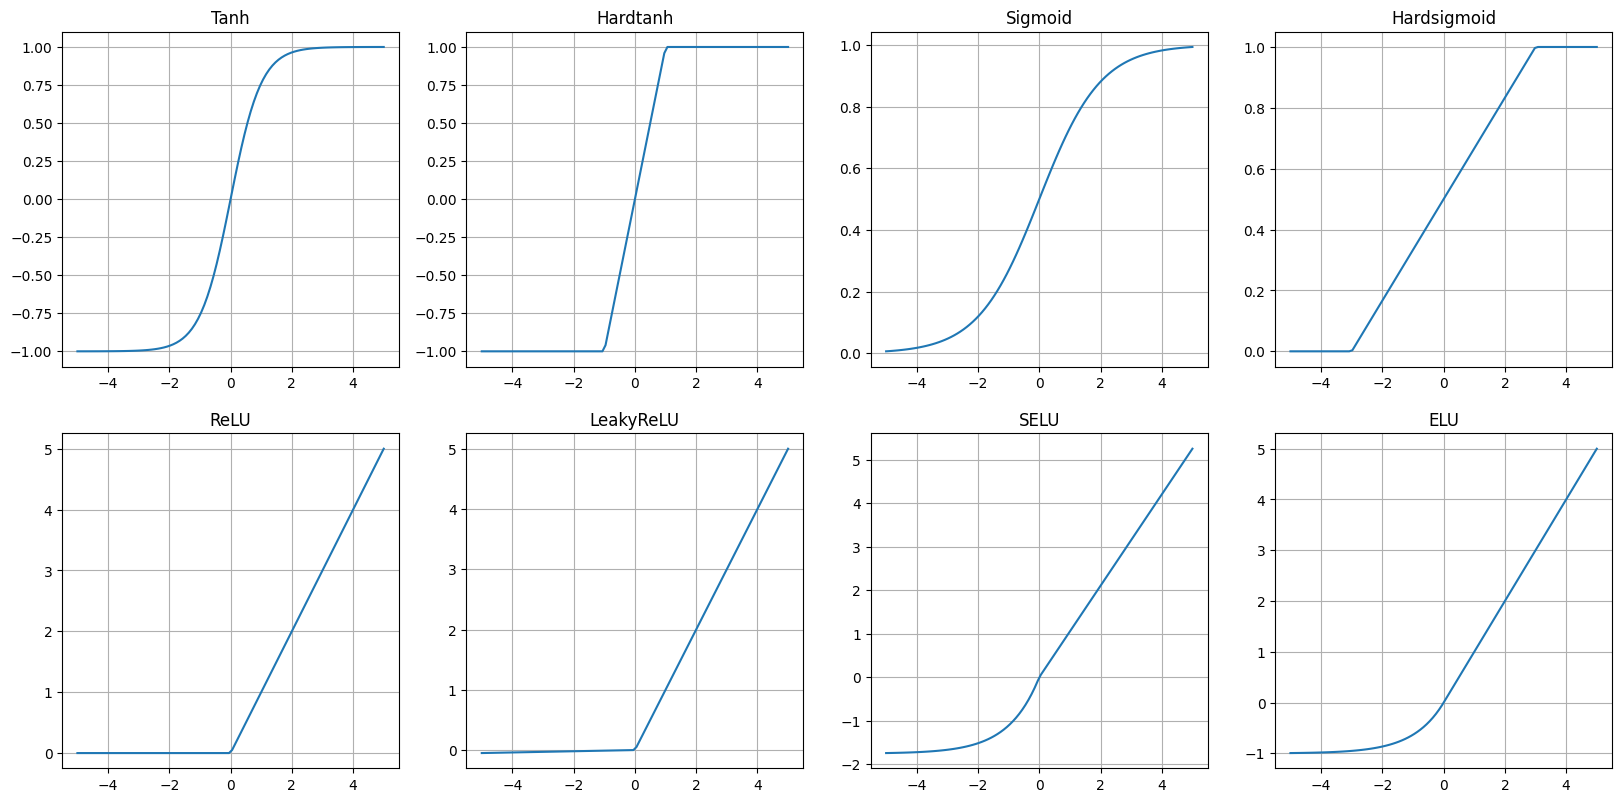

In [45]:
plt.figure(figsize=(20, 20))
i = 1
for activationFunction in [nn.Tanh(), nn.Hardtanh(), nn.Sigmoid(), nn.Hardsigmoid(), nn.ReLU(), nn.LeakyReLU(), nn.SELU(), nn.ELU()]:
    plt.subplot(4, 4, i)
    i += 1
    plt.grid(True)
    xs = torch.linspace(-5, 5, 100);
    ys = activationFunction(xs)
    plt.plot(xs, ys)
    plt.title(type(activationFunction).__name__)

## Ztrátová funkce

- Mean square error
    $$ \operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y_i})^2. $$
- Hinge
    $$ \operatorname{Hinge} = \sum_{i=1}^K \max(0, 1- Y_i \cdot \hat{Y_i}) $$
- KL divergence
    $$ \operatorname{KL} = - \sum_{i=1}^K \hat{Y_i} \cdot \log(\frac{Y_i}{\hat{Y_i}}) $$
- Cross-entropy
    $$ \operatorname{crossentropy} = - \sum_{i=1}^K Y_i \cdot \log(\hat{Y_i}) $$

## Optimalizační algoritmus

- SGD
- RMSProp
- Adagrad
- Adam
- Adadelta
- Adamax
- Nadam

### Learning schedule

Volitelně můžeme optimalizační algoritmy doplnit o tzv. weight decay - tj. postupnou změnu learning rate. Například

In [46]:
initial_learning_rate = 0.01
batch_count = 64
optimizer = torch.optim.SGD(model.parameters(), weight_decay=0.001)

Pro pokročilejší algoritmy typicky není weight decay potřeba, protože mají podobnou funkčnost již zabudovanou.

## Postupné používání datasetu

To, jak je dataset použit při trénování je určeno 2 parametry

- Epochy: kolikrát je celý dataset použit
- Batching: Dataset není použit prvek po prvku, ale vždy je najednou trénováno pomocí celé batch (mini-batch)

# Úkol 4

Zkuste upravit model na MNISTu a získat co nejlepší přesnost na testovací sadě pomocí výše popsaných parametrů

## Řešení

In [47]:
model = nn.Sequential()
model.append(nn.Flatten())
model.append(nn.Linear(data_train.data.shape[1] * data_train.data.shape[2], 256))
model.append(nn.Tanh())
model.append(nn.Linear(256, 128))
model.append(nn.Tanh())
model.append(nn.Linear(128, 10))

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): Tanh()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): Tanh()
  (5): Linear(in_features=128, out_features=10, bias=True)
)

In [48]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
epochs = 10

In [49]:
train_model(model, loss_fn, optimizer, epochs, dataloader_train, dataloader_test)

train loss: 0.338758  test loss: 0.299565  train accuracy: 0.910800  test accuracy: 0.912000  [sample 10000/60000] [epoch  1/10]
train loss: 0.227153  test loss: 0.264195  train accuracy: 0.922517  test accuracy: 0.917900  [sample 20000/60000] [epoch  1/10]
train loss: 0.208995  test loss: 0.228960  train accuracy: 0.932117  test accuracy: 0.930000  [sample 30000/60000] [epoch  1/10]
train loss: 0.189605  test loss: 0.177909  train accuracy: 0.950167  test accuracy: 0.947800  [sample 40000/60000] [epoch  1/10]
train loss: 0.184078  test loss: 0.171752  train accuracy: 0.951433  test accuracy: 0.946700  [sample 50000/60000] [epoch  1/10]
train loss: 0.172762  test loss: 0.150420  train accuracy: 0.958017  test accuracy: 0.955100  [sample 60000/60000] [epoch  1/10]
train loss: 0.111701  test loss: 0.142540  train accuracy: 0.961350  test accuracy: 0.957300  [sample 10000/60000] [epoch  2/10]
train loss: 0.105450  test loss: 0.129041  train accuracy: 0.965833  test accuracy: 0.959600  [sa

In [50]:
model.eval()
test_loss, test_acc = calculate_loss_accuracy(model, dataloader_test, loss_fn)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.07989097681427665
Test accuracy: 0.9799
